<a href="https://colab.research.google.com/github/winckey/CS_study/blob/master/bhyunco_python_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계

## 구간 추정

### 구간추정1 - 평균/표준편차

In [ ]:
import pandas as pd
raw = pd.DataFrame([77,74,78,75,73,74,74,75,77,76])
print('평균:',raw.mean()[0])
print('표준편차',raw.std()[0])

### 구간추정2 - 신뢰구간

In [ ]:
#95% 확률로 D스프의 맛의 평균은 00이라고 할 수 있다.
import numpy as np
from scipy import stats

# 데이터
data = [77,74,78,75,73,74,74,75,77,76]

# 평균과 표준편차
mean = np.mean(data)
std = np.std(data)

# 신뢰구간 계산
alpha = 0.05  # 유의 수준
n = len(data)  # 데이터 개수

# T 분포를 사용한 신뢰구간 (표본의 갯수가 충분하지 않을 경우)
t_conf = stats.t.interval(alpha=1-alpha, df=n-1, scale=std/np.sqrt(n))
t_lower = mean + t_conf[0] * std/np.sqrt(n)
t_upper = mean + t_conf[1] * std/np.sqrt(n)

# # N(0, 1) 분포를 사용한 신뢰구간 (표본의 갯수가 충분할 경우)
# z_conf = stats.norm.interval(alpha=1-alpha)
# z_lower = mean + z_conf[0] * std/np.sqrt(n)
# z_upper = mean + z_conf[1] * std/np.sqrt(n)

print(f"T 분포 신뢰구간: {t_lower} ~ {t_upper} 구간에 속할 확률이 95%입니다.")
# print("N(0, 1) 분포 신뢰구간:", (z_lower, z_upper))

T 분포 신뢰구간: 74.75482012377942 ~ 75.84517987622057 구간에 속할 확률이 95%입니다.


## 대응 표본 TTEST

### 대응표본TTEST 1

In [ ]:
#마법소스는 좋은 결과를 만든다.
#귀무가설은 마법소스가 들어가도 변화가 없다.
#대립가설은 마법소스가 들어가면 변화가 있다.
from scipy.stats import ttest_rel

x = [77,74,78,75,73,74,74,75,77,76]
y = [77,76,79,74,76,76,78,78,78,75]

t_statistic, p_value = ttest_rel(x, y)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)
if p_value<0.05:
  print("귀무가설 기각 - 마법소스가 들어가면 변화가 있다. = MSG최고 or 최악")
else :
  print("귀무가설 채택 - 마법소스가 들어가면 변화가 없다. = 이 소스는 큰 의미 없다")

t-statistic:  -2.584921310565987
p-value:  0.029457853822895275
귀무가설 기각 - 마법소스가 들어가면 변화가 있다. = MSG최고 or 최악


### 대응표본 TTEST2

In [ ]:
#마법소스는 큰 의미가 없다.
#귀무가설은 마법소스가 들어가도 변화가 없다.
#대립가설은 마법소스가 들어가면 변화가 있다.
from scipy.stats import ttest_rel

x = [77,74,78,75,73,74,74,75,77,76]
y = [77.1,74.1,78.1,75.1,72.9,73.9,73.9,74.9,76.9,75.9]

t_statistic, p_value = ttest_rel(x, y)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)
if p_value<0.05:
  print("귀무가설 기각 - 마법소스가 들어가면 변화가 있다. = MSG최고 or 최악")
else :
  print("귀무가설 채택 - 마법소스가 들어가면 변화가 없다. = 이 소스는 큰 의미 없다")

t-statistic:  0.6123724356957945
p-value:  0.5554454421055857
귀무가설 인정 - 마법소스가 들어가면 변화가 없다. = 이 소스는 큰 의미 없다


## Two sample TTEST

### Two Sample TTEST 1

In [ ]:
#같다고 할수있다.
import numpy as np
from scipy import stats

group1 = [77,74,78,75,73,74,74,75,77,76,77,74,78,75,73,74,74,75,77,76,77,74,78,75,73,74,74,75,77,76,77,74,78,75,73,74,74,75,77,76,76.8,74,79.3,80,69,75,85,72,80,60]
group2 = [76.8,74,79.3,80,69,75,85,72,80,60,67,77,88,76,55,76,72,82,62,90,86,87,66,55,77,73,71,79,89,67,55,56,77,54,64,56,77,88,89,90]
# print(len(group1),len(group2))
t_stat, p_value = stats.ttest_ind(group1, group2)
print('group1의 평균/표준편차 : ', np.mean(group1),"/",np.std(group1))
print('group2의 평균/표준편차 : ', np.mean(group2),"/",np.std(group2))
print(p_value)
if p_value < 0.05:
    print("다르다 - 귀무가설 기각!(두 그룹은 다른 그룹이다!(맛점수에 한해서))")
else:
    print("같다 - 귀무가설 채택!(두 그룹은 같은 그룹이다!(맛점수에 한해서))")

group1의 평균/표준편차 :  75.262 / 3.2841979233901237
group2의 평균/표준편차 :  73.8025 / 10.95943628796664
0.37968715757466787
같다 - 귀무가설 인정!((두 그룹은 같은 그룹이다!(맛점수에 한해서))


## 상관분석 

In [ ]:
# 실행 후 다시 연결 끊고 진행 글씨체 ( 런타인 재시작 눌러줘야 함)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import pandas as pd
vege_raw = [10.5, 19.5, 3.4, 18.6, 15.0, 7.9, 17.7, 7.8, 9.3, 3.9, 7.2, 15.1, 14.6, 15.4, 8.7, 13.3, 7.0, 17.2, 17.4, 7.1]
meat_raw = [17.0, 12.2, 9.4, 2.8, 18.0, 18.3, 0.5, 2.4, 8.9, 6.5, 11.6, 1.9, 11.7, 19.0, 19.9, 4.8, 2.3, 6.5, 13.8, 11.1]
cstock_raw = [15.0, 10.5, 15.7, 19.3, 15.0, 8.2, 19.9, 6.8, 16.0, 0.7, 7.8, 10.9, 16.7, 13.7, 15.7, 12.3, 11.1, 7.7, 8.5, 6.4]
bstock_raw = [0.4, 2.3, 2.2, 19.5, 13.3, 14.0, 12.7, 18.8, 16.4, 16.9, 17.4, 19.4, 4.5, 5.5, 7.5, 0.1, 6.8, 10.7, 0.7, 7.3]
A_favor =[28.4, 32.1, 21.3, 40.4, 34.2, 19.8, 42.2, 19.2, 28.2, 9.4, 17.7, 30.5, 31.7, 32.7, 26.7, 29.6, 23.0, 29.9, 26.6, 15.7]
B_favor =[19.3, 14.4, 11.7, 5.7, 18.9, 19.4, 1.1, 4.9, 11.3, 7.5, 14.2, 2.7, 13.1, 21.5, 21.3, 5.3, 2.8, 9.4, 13.8, 11.1]
C_favor = [77.1, 79.5, 56.3, 87.6, 90.2, 59.1, 87.5, 43.6, 69.9, 28.0, 52.5, 66.0, 79.5, 89.5, 75.8, 67.5, 50.7, 69.7, 69.1, 42.5]
df = pd.DataFrame([vege_raw,meat_raw,cstock_raw,bstock_raw,A_favor,B_favor,C_favor]).T
df.columns = ['야채건더기','고기건더기','치킨육수','소고기육수','감칠맛','식감','맛점수']
df.head(4)

,야채건더기,고기건더기,치킨육수,소고기육수,감칠맛,식감,맛점수
0,10.5,17.0,15.0,0.4,28.4,19.3,77.1
1,19.5,12.2,10.5,2.3,32.1,14.4,79.5
2,3.4,9.4,15.7,2.2,21.3,11.7,56.3
3,18.6,2.8,19.3,19.5,40.4,5.7,87.6


In [ ]:
corr = df.corr()
corr

,야채건더기,고기건더기,치킨육수,소고기육수,감칠맛,식감,맛점수
야채건더기,1.000000,-0.064021,0.392747,-0.109873,0.841550,-0.054911,0.777466
고기건더기,-0.064021,1.000000,0.030383,-0.379716,-0.094596,0.988478,0.278727
치킨육수,0.392747,0.030383,1.000000,-0.154052,0.804421,0.057245,0.794717
소고기육수,-0.109873,-0.379716,-0.154052,1.000000,-0.085107,-0.337946,-0.212229
감칠맛,0.841550,-0.094596,0.804421,-0.085107,1.000000,-0.071306,0.927093
식감,-0.054911,0.988478,0.057245,-0.337946,-0.071306,1.000000,0.303714
맛점수,0.777466,0.278727,0.794717,-0.212229,0.927093,0.303714,1.000000


In [ ]:
corr.iloc[4:,:4].round(2)

,야채건더기,고기건더기,치킨육수,소고기육수
감칠맛,0.84,-0.09,0.80,-0.09
식감,-0.05,0.99,0.06,-0.34
맛점수,0.78,0.28,0.79,-0.21


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


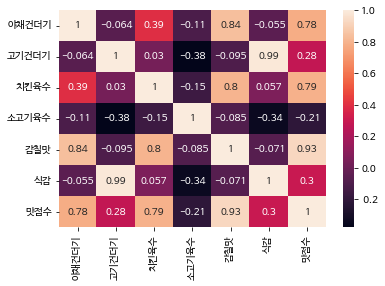

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr, annot=True)
plt.rcParams['figure.dpi'] = 200
plt.show()

## 회귀분석

### 회귀분석1

Intercept    35.742000
야채건더기         2.649028
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    맛점수   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     27.51
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           5.48e-05
Time:                        07:18:52   Log-Likelihood:                -75.671
No. Observations:                  20   AIC:                             155.3
Df Residuals:                      18   BIC:                             157.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

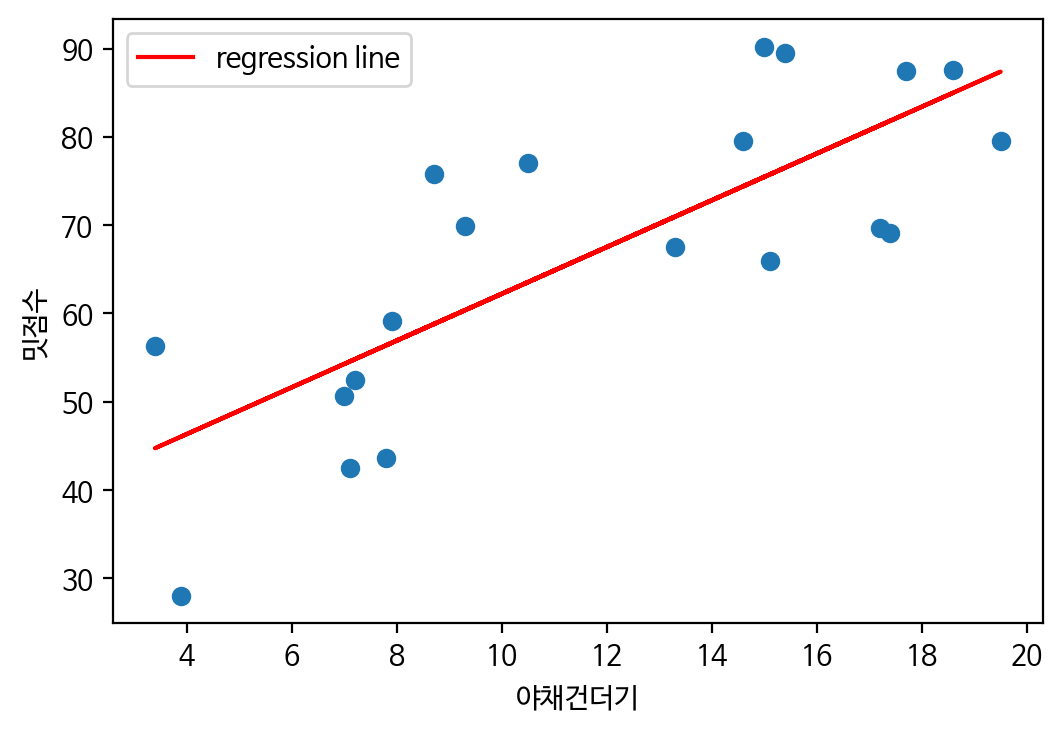

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Fit regression model
model = smf.ols(formula='맛점수 ~ 야채건더기', data=df)
results = model.fit()

# Print summary of results
print(results.params)
print(results.summary())
# Plot regression line
plt.scatter(df['야채건더기'], df['맛점수'])
plt.plot(df['야채건더기'], results.predict(df['야채건더기']), 'r', label='regression line')
plt.legend()
plt.xlabel('야채건더기')
plt.ylabel('밋점수')
plt.show()

### 회귀분석2

Intercept    33.555200
치킨육수          2.818394
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    맛점수   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     30.86
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.84e-05
Time:                        07:20:20   Log-Likelihood:                -74.960
No. Observations:                  20   AIC:                             153.9
Df Residuals:                      18   BIC:                             155.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

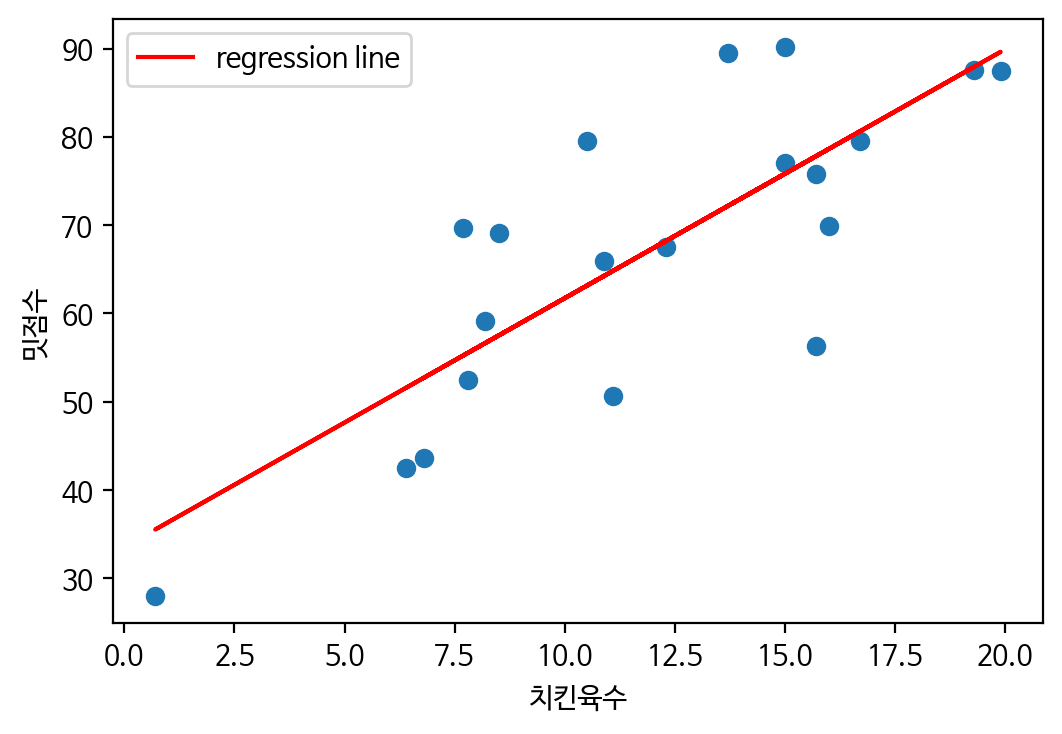

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Fit regression model
model = smf.ols(formula='맛점수 ~ 치킨육수', data=df)
results = model.fit()

# Print summary of results
print(results.params)
print(results.summary())

# Plot regression line
plt.scatter(df['치킨육수'], df['맛점수'])
plt.plot(df['치킨육수'], results.predict(df['치킨육수']), 'r', label='regression line')
plt.legend()
plt.xlabel('치킨육수')
plt.ylabel('밋점수')
plt.show()

### 회귀분석3-1

Intercept    20.493136
치킨육수          2.052032
야채건더기         1.874720
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    맛점수   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     67.13
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           8.53e-09
Time:                        07:20:32   Log-Likelihood:                -63.088
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      17   BIC:                             135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

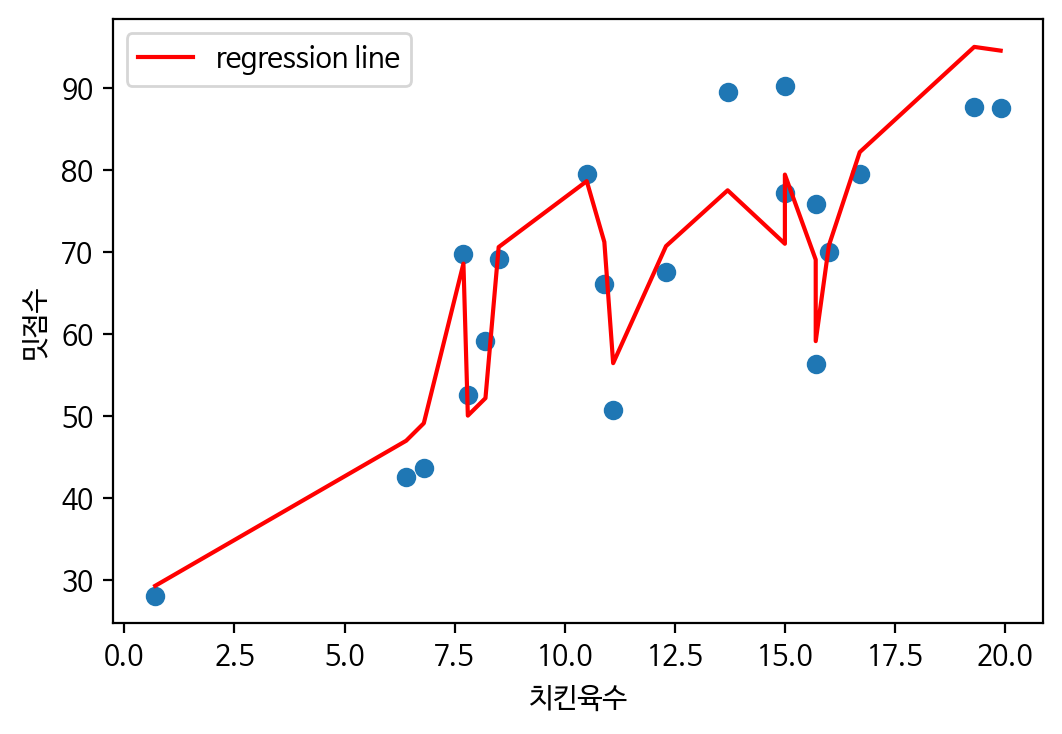

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Fit regression model
model = smf.ols(formula='맛점수 ~ 치킨육수 + 야채건더기', data=df)
results = model.fit()

# Print summary of results
print(results.params)
print(results.summary())

# Plot regression line
plt.scatter(df['치킨육수'], df['맛점수'])
plt.plot(df['치킨육수'].sort_values(), results.predict(df[['치킨육수','야채건더기']].sort_values(by='치킨육수')), 'r', label='regression line')
plt.legend()
plt.xlabel('치킨육수')
plt.ylabel('밋점수')
plt.show()

### 회귀분석3-2

Intercept    20.493136
야채건더기         1.874720
치킨육수          2.052032
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    맛점수   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     67.13
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           8.53e-09
Time:                        07:20:53   Log-Likelihood:                -63.088
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      17   BIC:                             135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

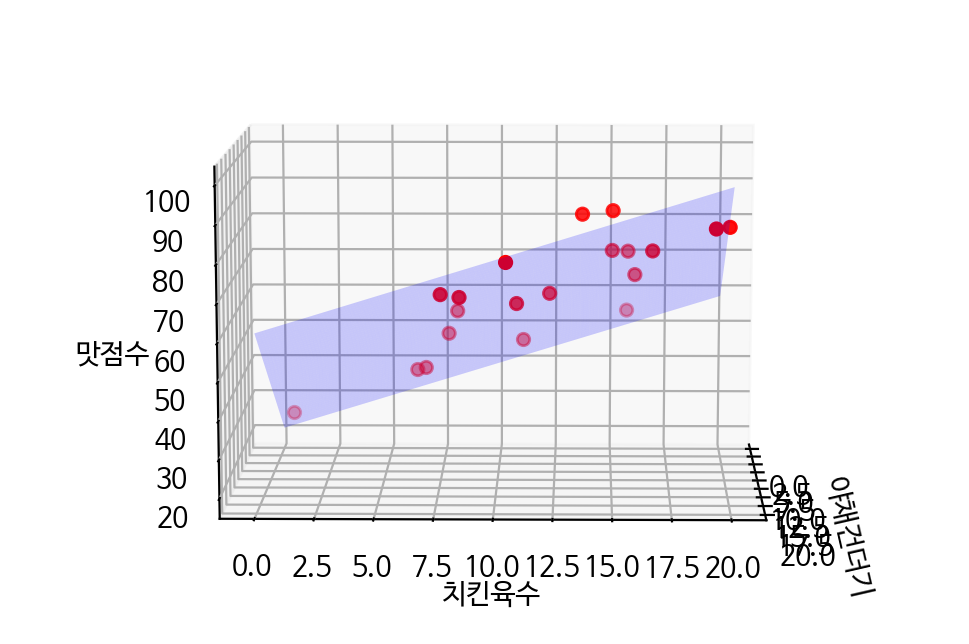

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
model = smf.ols(formula='맛점수 ~ 야채건더기 + 치킨육수', data=df)
results = model.fit()

# Print summary of results
print(results.params)
print(results.summary())
fig = plt.figure()   # figsize=(8, 5) 옵션은 Jupyter Notebook 에서만 사용할 수 있습니다.  
ax = fig.add_subplot(111, projection='3d')   # 111=1x1 grid 1st subplot

# 도출된 공식 면으로 도출
X = np.linspace(0, 20, 500)
Y = np.linspace(0, 20, 500)
X, Y = np.meshgrid(X, Y)
Z = 2.052032*X + 1.874720 *Y + 20.493136
ax.plot_surface(X, Y, Z,color='blue',alpha = 0.2)

#실제수치 스캐터
ax.set_xlabel('야채건더기')   # x label name set   ax.set_ylabel('X2')    # y label name set   ax.set_zlabel('Y')     # z label name set
ax.set_ylabel('치킨육수')   # x label name set   ax.set_ylabel('X2')    # y label name set   ax.set_zlabel('Y')     # z label name set
ax.set_zlabel('맛점수')   # x label name set   ax.set_ylabel('X2')    # y label name set   ax.set_zlabel('Y')     # z label name set
ax.scatter(df['야채건더기'], df['치킨육수'], df['맛점수'],c='red', marker='o')     # 치킨육수,야채건더기,맛점수 실제 수치
ax.view_init(10,1) 
# Show the plot
plt.show()


In [ ]:
results.params #intercept - y절편 / 야채건더기 기울기 - 1.88 / 치킨육수 - 2.05

NameError: ignored